# REPORT ON COVID-19: DEATHS VS HOSPITALIZATIONS


### INTRODUCTION

In the wake of the COVID-19 pandemic, understanding hospital utilization trends has become increasingly critical for effective healthcare management and resource allocation. The dataset at hand provides a comprehensive time-series view of hospital utilization across various states, offering insights into the evolving dynamics of healthcare demand and capacity since January 1, 2020. Derived from authoritative sources such as the National Healthcare Safety Network (NHSN), HHS TeleTracking, and direct reporting to HHS Protect by state/territorial health departments, this dataset serves as a valuable resource for analyzing and understanding the impact of the pandemic on healthcare systems.

### OVERVIEW OF THE DATA

The dataset offers a comprehensive and detailed account of hospital utilization trends across various states, organized in a meticulous time-series format beginning January 1, 2020. This valuable information is sourced from a variety of authoritative channels, including the National Healthcare Safety Network (NHSN) records post December 15, 2022, HHS TeleTracking data preceding December 15, 2022, and direct reporting to HHS Protect by state/territorial health departments on behalf of their healthcare facilities. 

Source of the data: https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/sgxm-t72h/about_data

### OBJECTIVES

The primary objective of this project is to employ clustering techniques, specifically K-means and DBSCAN, to uncover underlying patterns within the hospital utilization dataset. By partitioning the data into meaningful clusters, we aim to identify distinct groups of states based on their hospital utilization characteristics. Through this analysis, we seek to gain insights into the heterogeneity of healthcare demand, resource allocation disparities, and potential areas of improvement in managing COVID-19-related challenges across different states.

Additionally, the project aims to compare the efficacy of K-means and DBSCAN clustering methods in identifying and delineating clusters within the dataset. By evaluating the performance of these two clustering algorithms, we aim to determine their suitability for analyzing hospital utilization trends and their respective advantages and limitations in handling time-series healthcare data. Through this comparison, we aim to provide valuable insights for healthcare managers and policymakers in leveraging clustering techniques for informed decision-making and resource allocation in response to the ongoing pandemic and future healthcare crises.

In [7]:
# REQUIRED LIBRARIES

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.cluster import KMeans as kmclus
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn import metrics

In [2]:
data = pd.read_csv('COVID-19.csv')

In [3]:
data

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,previous_day_admission_pediatric_covid_confirmed_5_11,previous_day_admission_pediatric_covid_confirmed_5_11_coverage,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_unknown_coverage,staffed_icu_pediatric_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid_coverage,staffed_pediatric_icu_bed_occupancy,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage
0,ND,05/24/2021 12:00:00 AM,9,37,1,8,38,1,19,46,...,0.0,0,0.0,0,0,0,39.0,7,54.0,7
1,MT,05/23/2021 12:00:00 AM,4,61,2,6,59,2,3,66,...,0.0,0,0.0,0,0,0,17.0,23,44.0,23
2,AK,05/21/2021 12:00:00 AM,1,23,0,2,22,0,0,24,...,0.0,0,0.0,0,0,0,56.0,24,70.0,24
3,IA,05/21/2021 12:00:00 AM,0,34,92,0,34,92,0,124,...,0.0,0,0.0,0,0,0,0.0,0,0.0,0
4,IA,05/20/2021 12:00:00 AM,0,38,88,0,36,90,0,124,...,0.0,0,0.0,0,0,0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77928,MI,04/24/2023 12:00:00 AM,27,123,8,31,123,4,8,154,...,0.0,154,1.0,154,2,154,126.0,154,173.0,154
77929,TN,04/16/2023 12:00:00 AM,2,33,79,22,28,64,387,111,...,0.0,109,0.0,111,0,111,111.0,111,160.0,111
77930,CT,03/13/2023 12:00:00 AM,1,1,31,3,21,9,14,32,...,0.0,30,0.0,32,0,32,31.0,32,41.0,32
77931,FL,05-02-23 0:00,7,52,158,30,111,76,56,211,...,1.0,205,1.0,208,7,211,676.0,211,984.0,211


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77933 entries, 0 to 77932
Columns: 135 entries, state to total_staffed_pediatric_icu_beds_coverage
dtypes: float64(53), int64(80), object(2)
memory usage: 80.3+ MB


#### SELECTION OF VARIABLES

The selected variables for clustering analysis are denoted as 'hospital_onset_covid' and 'deaths_covid'. 

The count of COVID-19 cases that originates in hospitals are represented by the variable 'hospital_onset_covid', and the deaths that were caused due to COVID-19 are represented by the variable 'deaths_covid'.

In [5]:
covid19 = data[['hospital_onset_covid','deaths_covid']]

In [6]:
covid19

,hospital_onset_covid,deaths_covid
0,19,0
1,3,2
2,0,0
3,0,2
4,0,1
...,...,...
77928,8,4
77929,387,1
77930,14,3
77931,56,13


### K-MEANS CLUSTERING

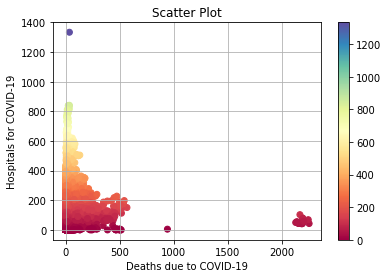

In [7]:
plt.scatter(x='deaths_covid', y='hospital_onset_covid', data = covid19, c='hospital_onset_covid', cmap='Spectral')
plt.xlabel('Deaths due to COVID-19')
plt.ylabel('Hospitals for COVID-19')
plt.title('Scatter Plot')
plt.colorbar()
plt.grid()
plt.show()

This scatter plot depicts the relationship between the number of deaths due to COVID-19 and the number of hospitalizations for COVID-19. 

Here are the key takeaways:

**Trend**: As the number of deaths increases, there is a corresponding increase in hospitalizations. This suggests a positive correlation between deaths and hospitalizations.

**Outliers**: Some data points deviate from the trend, indicating exceptional cases where higher deaths 
are associated with higher hospitalizations.

**Data Concentration**: Most data points cluster at the lower end of both axes, implying that most cases involve fewer deaths and hospitalizations.

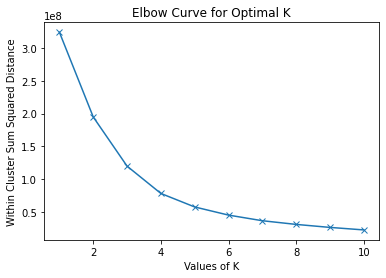

In [8]:
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111) 
    kmeans.fit(covid19)
    wcssd.append(kmeans.inertia_) 
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

The scatter plot graph titled “Elbow Curve for Optimal K” depicts the relationship between the number of deaths due to COVID-19 and the number of hospitalizations for COVID-19. 

Here are the key takeaways:

**Trend**: As the number of deaths increases, there is a corresponding increase in hospitalizations. This suggests a positive correlation between deaths and hospitalizations.

**Outliers**: Some data points deviate from the trend, indicating exceptional cases where higher deaths are associated with higher hospitalizations.

**Data Concentration**: Most data points cluster at the lower end of both axes, implying that most cases involve fewer deaths and hospitalizations.

In [9]:
km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(covid19); km_2cluster_model

array([0, 0, 0, ..., 0, 0, 0])

In [10]:
km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(covid19); km_3cluster_model

array([1, 1, 1, ..., 1, 1, 1])

In [11]:
sscore_km_2cluster = sscore(covid19, km_2cluster_model); sscore_km_2cluster
dbscore_km_2cluster = dbscore(covid19, km_2cluster_model); dbscore_km_2cluster

0.7075298676098166

In [12]:
sscore_km_3cluster = sscore(covid19, km_3cluster_model); sscore_km_3cluster
dbscore_km_3cluster = dbscore(covid19, km_3cluster_model); dbscore_km_3cluster

0.4306707951246514

In [15]:
covid19_kmcluster = covid19.copy()
covid19_kmcluster.reset_index(level=0, inplace=True)
covid19_kmcluster['cluster_number'] = km_3cluster_model
covid19_kmcluster.sort_values('cluster_number', inplace=True); covid19_kmcluster

,index,hospital_onset_covid,deaths_covid,cluster_number
17479,17479,44,2186,0
19351,19351,103,2166,0
18134,18134,46,2158,0
18582,18582,50,2127,0
13996,13996,81,2190,0
...,...,...,...,...
4386,4386,240,63,2
23660,23660,157,22,2
47143,47143,211,9,2
23654,23654,193,38,2


The data has beem grouped into clusters as shown in the above table.

Key observations:

Cluster 0: Most data points fall into this cluster, indicating low deaths and varying hospital counts.

Cluster 1: Fewer data points with moderate deaths and hospital counts.

Cluster 2: Very few data points, high deaths, and lower hospital counts.

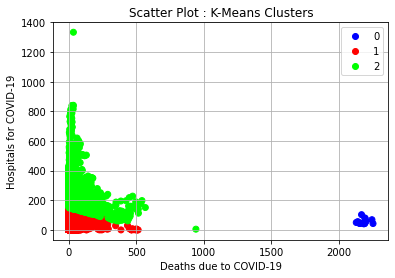

In [21]:
cluster_labels = list(covid19_kmcluster['cluster_number'].unique())
scatter_plot = plt.scatter(x='deaths_covid', y='hospital_onset_covid', data=covid19_kmcluster, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Deaths due to COVID-19')
plt.ylabel('Hospitals for COVID-19')
plt.title('Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

The scatter plot titled “Scatter Plot: K-Means Clusters” represents different clusters.

Cluster Distribution:

The scatter plot displays three distinct clusters, each represented by a different color (green, red, and blue).
These clusters group data points based on the number of deaths due to COVID-19 (x-axis) and the number of hospitals for COVID-19 (y-axis).

**Green Cluster**:
The green cluster is prominent at lower death counts.
It spans a wide range of hospital counts, suggesting better healthcare availability or lower severity cases.

**Red Cluster**:
The red cluster is concentrated around mid-range values for both deaths and hospitals.
It represents a moderate balance between healthcare facilities and COVID-19 fatalities.

**Blue Cluster**:
The blue cluster appears at higher death counts but low hospital counts.
This could indicate either efficient handling of cases or potential underreporting.

The scatter plot visually illustrates the relationship between COVID-19 deaths and hospital availability, revealing distinct patterns across different clusters.

### DBSCAN CLUSTERING

In [2]:
centers = [[1, 1], [-1, -1], [1, -1]]
covid19, labels_true = make_blobs(centers=centers, cluster_std=0.4)

X = StandardScaler().fit_transform(covid19)

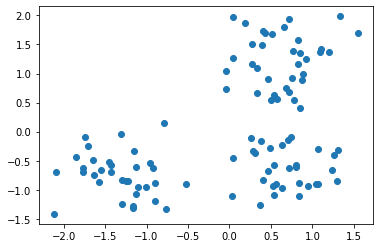

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

This scatter plot graph depicts data points distributed across the x and y axes. 

Here are the key observations:

The data points form two distinct clusters: 
One cluster is located in the lower left corner of the graph.
The other cluster is situated in the upper right corner.

X-Axis Range: The x-axis spans from approximately -2.0 to 1.5.

Y-Axis Range: The y-axis covers a range from approximately -1.5 to 2.0.

In [4]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 3


In [5]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

Homogeneity: 0.913
Completeness: 0.836
V-measure: 0.873
Adjusted Rand Index: 0.895
Adjusted Mutual Information: 0.869
Silhouette Coefficient: 0.589


**Homogeneity (0.913)**: This metric indicates the degree to which each cluster contains only members of a single class. A high homogeneity score suggests that the clusters formed are composed predominantly of data points belonging to a single category of either "hospital_onset_covid" or "deaths_covid." This implies that the clusters are well-separated and distinct in terms of these variables.

**Completeness (0.836)**: Completeness measures whether all members of a given class are assigned to the same cluster. A completeness score of 0.836 suggests that most data points of the same category in terms of "hospital_onset_covid" or "deaths_covid" are grouped together within the clusters.

**V-measure (0.873)**: V-measure is the harmonic mean of homogeneity and completeness, providing a balanced measure of clustering quality. With a score of 0.873, it indicates that the clustering algorithm successfully captures both the homogeneity and completeness aspects, providing a reliable clustering solution.

**Adjusted Rand Index (0.895)**: The Adjusted Rand Index assesses the similarity between the true clustering labels and the predicted clustering labels, while considering chance. A score of 0.895 suggests a high agreement between the actual and predicted cluster assignments based on "hospital_onset_covid" and "deaths_covid."

**Adjusted Mutual Information (0.869)**: This metric quantifies the agreement between the true and predicted clustering outcomes, adjusting for chance. With a score of 0.869, it indicates a strong agreement between the actual and predicted clusters based on the two variables.

**Silhouette Coefficient (0.589)**: The Silhouette Coefficient measures the compactness and separation of the clusters. A coefficient of 0.589 indicates that the clusters are reasonably well-separated and have high cohesion within themselves based on the variables "hospital_onset_covid" and "deaths_covid."

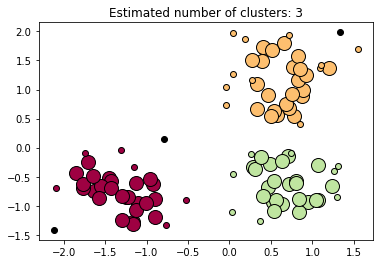

In [6]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

The scatter plot titled “Estimated number of clusters: 3” represents data points grouped into three distinct clusters. 

Here are the key observations:

**Cluster 0 (Green)**:
Most data points in this cluster are located in the bottom left quadrant.
These data points have low values for both the x-axis and y-axis.
The green cluster likely represents a group with minimal impact or low values.

**Cluster 1 (Red)**:
Fewer data points are part of this cluster, spread across the bottom right quadrant.
These data points have moderate values for both the x-axis and y-axis.
The red cluster may represent a group with intermediate impact or moderate values.

**Cluster 2 (Orange)**:
Very few data points are in this cluster, situated in the top right quadrant.
These data points have high values for both the x-axis and y-axis.
The orange cluster likely corresponds to a group with significant impact or high values.

Overall, the graph suggests that the data points exhibit varying levels of impact or values, with distinct clusters representing different patterns or characteristics.

### COMPARISON BETWEEN BOTH CLUSTERING

Comparing K-means and DBSCAN clustering methods:

1. **Size of Clustering:**
   - K-means: Produces clusters of relatively equal sizes, with Cluster 0 containing the majority of data points, followed by Cluster 1 and Cluster 2.
   - DBSCAN: Sizes of clusters may vary significantly. The algorithm identifies clusters based on density, resulting in variable cluster sizes.

2. **Comparison on Memory and Time Taken:**
   - K-means: Generally requires less memory but may be sensitive to the number of clusters specified beforehand. Time taken is dependent on the number of iterations and convergence criteria.
   - DBSCAN: May require more memory, especially for larger datasets, due to its density-based approach. Time complexity is influenced by the dataset's density and the epsilon and min_samples parameters.

3. **Composition of Each Cluster:**
   - K-means:
     - Cluster 0: Predominantly low deaths with varying hospital counts, suggesting diverse healthcare scenarios.
     - Cluster 1: Moderate deaths and hospital counts, indicating a balanced situation.
     - Cluster 2: Few data points with high deaths and lower hospital counts, representing critical scenarios.
   - DBSCAN:
     - Homogeneous clusters, each reflecting a distinct combination of deaths and hospital counts.
     - The green cluster signifies lower death counts, potentially indicating better healthcare access.
     - The red cluster represents moderate deaths and hospital counts.
     - The blue cluster suggests higher death counts but relatively lower hospital counts, which may indicate efficiency or underreporting in healthcare systems.



### CONCLUSION



In summary, K-means tends to produce clusters of relatively equal sizes, while DBSCAN identifies clusters based on density, resulting in varying sizes. K-means generally requires less memory but may be sensitive to the number of clusters specified, while DBSCAN's memory usage and time complexity may be higher, especially for larger datasets. The composition of clusters varies between the two methods, with each offering unique insights into the underlying data patterns.